<a href="https://colab.research.google.com/github/theabhinav0231/dive_into_deep_learning_book/blob/main/08_5_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

## **Training Deep Neural Networks**

Training deep neural networks is challenging, particularly achieving convergence efficiently. Batch normalization (Ioffe and Szegedy, 2015) addresses this by:

- Accelerating Convergence: By normalizing layer activations during training, it enables faster and more stable optimization. This has made training very deep networks (e.g., 100+ layers) practical, especially when combined with residual blocks.
- Improving Regularization: Batch normalization inherently regularizes the model, reducing overfitting, similar to noise injection or dropout techniques.
- Ensuring Numerical Stability: It mitigates issues caused by large variations in intermediate activations (e.g., scale drift across layers or training steps), improving compatibility with optimizers like Adam and AdaGrad.

Key Insights:
- Standardization in data preprocessing (e.g., zero mean and unit variance) helps control complexity and stabilizes optimization. Batch normalization extends this concept within networks by normalizing layer activations adaptively.
- It helps avoid distribution drift across layers during training, which can otherwise slow convergence or require compensatory learning rate adjustments.
- Its benefits include preprocessing, stability, and regularization, making it a foundational technique for modern deep learning.

## **Batch Normalization**

**Batch Normalization (BN)** normalizes the inputs of each layer during training, stabilizing and accelerating convergence. Key points:  

1. **Process:**
   - Normalize inputs in a minibatch by subtracting the mean (𝜇𝐵) and dividing by the standard deviation (σB).
   - Apply a learned scale (γ) and shift (β) to preserve model flexibility.
   - Small constant (ϵ) ensures numerical stability (avoiding division by zero).

2. **Minibatch Dependency:**
   - BN relies on minibatch statistics (μB, 𝜎𝐵), making batch size critical. Ideal sizes (50–100) balance noise and stability.
   - Extremely small batches cause instability, while very large ones reduce regularization benefits.

3. **Benefits:**
   - Prevents divergence in activation magnitudes across layers.
   - Allows for higher learning rates, enhancing training speed.
   - Introduces noise from minibatch estimates, which regularizes the model and reduces overfitting.

4. **Theoretical Insights:**
   - Noise from BN acts as implicit regularization, potentially linked to Bayesian priors and penalties.
   - Moderate minibatch sizes inject "just the right amount" of noise for effective training.

Batch normalization remains an essential tool for stabilizing and improving deep learning performance.

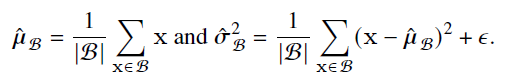

After training a model, **batch normalization (BN)** uses the entire dataset to calculate precise means and variances for normalization, ensuring consistent behavior during inference. Key points:

- Training Mode: BN normalizes using minibatch statistics (μB, σB), introducing variability based on the batch.
- Inference Mode: BN normalizes using precomputed dataset-wide statistics, providing stable outputs unaffected by batch composition.
- Comparison to Dropout: Like dropout, BN behaves differently during training (adds variability) and inference (removes variability), serving as both a regularization and stabilization mechanism.

## **Fully Connected Layers**

When applying batch normalization to fully connected layers, Ioffe and Szegedy (2015), in
their original paper inserted batch normalization after the affine transformation and before
the nonlinear activation function.

The mean and variance are computed on the same minibatch on which the transformation
is applied.

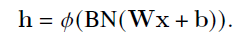

## **Convolutional Layers**


In convolutional layers, batch normalization (BN) is applied after the convolution and before the activation function, with key differences from fully connected layers:

- Per-Channel Normalization: BN is performed on a per-channel basis across all spatial locations, ensuring compatibility with the translation invariance assumption of convolutions.
- Mean and Variance Calculation: For a minibatch of
𝑚 examples with feature maps of size 𝑝 × 𝑞, BN computes mean and variance using all 𝑚 ⋅ 𝑝 ⋅ 𝑞 elements per channel.
- Channel-Specific Parameters: Each channel has its own learned scale (𝛾) and shift (𝛽) parameters, applied uniformly across spatial locations.

## **Layer Normalization**


Layer normalization is similar to batch normalization but applied to individual observations rather than minibatches. Key points:

- Definition: Applied to an 𝑛 n-dimensional vector
𝑥, where the mean 𝜇 and variance 𝜎2 are computed over the vector's elements (not across a minibatch).

- Scaling and Offsetting: Both scaling and offset factors are applied element-wise, with learned parameters 𝛾 and 𝛽.

Advantages:

- Independence from Minibatch Size: It works with any batch size, including size 1, and is not affected by training or inference modes.
- Prevents Divergence: Layer normalization is scale-independent, making it more stable and helpful in preventing divergence during optimization.

Use Case: It’s particularly useful when batch normalization is not feasible or when batch sizes are very small.

For an n-dimensional vector x, layer norms are given by-

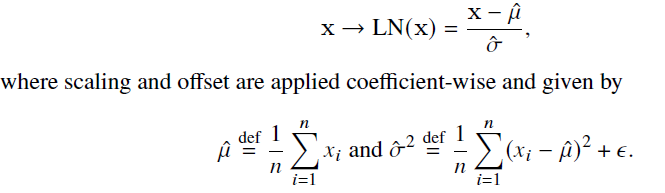

## **Batch Normalization during Prediction**

**Batch normalization** behaves differently during **training** and **prediction**:

- Training Mode: It uses minibatch statistics (mean and variance) for normalization, introducing noise due to sample variability.
   
- Prediction Mode: Once trained, stable estimates of the statistics are computed from the entire dataset and fixed for use during inference, eliminating the noise.

This distinction is similar to how **dropout** operates, where it is active during training but not during inference.